In [1]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm          
sys.path.insert(0, '../Modules')
import erqMedSpec 
import erqScaling
from line_db import line_db
import os
from scipy import interpolate
from scipy.io import loadmat
# Reading data
# smp=Table.read('/home/reza/erq/sampling/org_sample2.fits')
smp=Table.read('../LumMatch/LumMatch.fits')
W3_0=smp['ABw3']
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
z_dr12=smp['z_dr12']
plate = smp['Plate']
mjd = smp['MJD']
fiberid= smp['FiberID']
iz_0 = iW3_0 - smp['r-w3'] + smp['r-z']
Lum_0 = smp['Lum']

In [ ]:
# def DensityBinner_3d(sample,  ERQ, bw, rhoBin, opening_angle, coneVector):
#         """ Sample -> scaled sample
#                 sample_direction-> angels of all sample points from ERQ vector
#         """

#         from scipy.stats   import gaussian_kde
#         import numpy as np
#         dimSample = np.size(sample, axis=1)
#         nSample=len(sample)
#         MainCenter = np.median(sample, axis=0)
#         nBin = len(rhoBin)
#         bin_label=np.zeros(nSample)
#         bin_pop=np.zeros(nBin)
#         tip_label=np.zeros(nSample)
#         r=np.zeros(nSample) # distance from MainCenter
#         MedianBins=np.zeros([nBin, dimSample+1])
#         sample_direction = erqMedSpec.separation(sample-MainCenter, coneVector)

#         values = sample.T
#         kde = gaussian_kde(values)
#         kde.set_bandwidth(bw_method=kde.factor*bw)
#         density = kde(values)
#         density_max = max(density)
#         density/=density_max


#         nBin = np.size(rhoBin)
# #     tip-label
#         for i in range(nSample):
#             if density[i] >= rhoBin[1]:
#                 tip_label[i]=1

#         for k in range(nBin):
#             for i in range(nSample):
#                 if (np.arccos(sample_direction[i])<=opening_angle):
#                     if(k<nBin-1):
#                         if((density[i] <= rhoBin[k]) and (density[i] >= rhoBin[k+1])):
#                             bin_label[i] = k+1
#                             bin_pop[k]+=1
#                     else:
#                         if(density[i] <= rhoBin[k]):
#                             bin_label[i]=nBin
#                             bin_pop[nBin-1]+=1

#         return bin_label, bin_pop, tip_label, MedianBins, rhoBin

# def uniter(sampleVector):
#         """
#         gets a bunch of vectors gives unit vectors
#         """
#         sampleVector_unit = np.zeros(np.shape(sampleVector))
#         L = np.linalg.norm(sampleVector,axis=1)
#         for i in range(len(sampleVector)):
#                 sampleVector_unit[i,:] = sampleVector[i,:]/L[i]
#         return sampleVector_unit


# def opening_angle_finder(ERQ, Main_center,  enclosing_ratio, resolution):
#         import numpy as np
#         from scipy.stats import cumfreq
#         import erqMedSpec
#         ERQ_center = np.median(ERQ, axis=0)
#         ERQ_vector = np.array(ERQ_center) - Main_center
#         ERQ_vector_unit =  erqMedSpec.vectors_uniter(ERQ_vector)
#         ERQ = ERQ - Main_center
#         ERQ_unit = erqMedSpec.vectors_uniter(ERQ)

#         wedge_direction = erqMedSpec.modified_arctan(ERQ_vector[0], ERQ_vector[1])
#         ERQ_angles=[]
#         for i in range(len(ERQ)):
#                 ERQ_angles.append(np.arccos(np.dot(ERQ_vector_unit, ERQ_unit[i,:])))



#         res = cumfreq(ERQ_angles, numbins=resolution)
#         x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
#                                         res.cumcount.size)
#         count = res.cumcount
#         # return np.rad2deg(np.arccos(x[np.where(count==int(enclosing_ratio*len(ERQ_dir)))]))
#         angle = x[np.where(count>=int(enclosing_ratio*len(ERQ_angles)))]
#         return angle[0], wedge_direction



In [2]:
# ############################################################################
# Sample reading 
ERQ_rew = 2#(2 - min(rew_0))/(max(rew_0)-min(rew_0))
ERQ_color = 4.6#(4.6 - min(iW3_0))/(max(iW3_0)-min(iW3_0))
X=np.array(list(zip(iW3_0, rew_0, kt80_0)))
# np.savetxt('data.dat', X)
# X_sc, minData, rangeData = erqScaling.MinMaxScaler(X)
mask = ((iW3_0>=4.6) & (rew_0>=2))
# ERQ= X_sc[mask]
ERQ0= X[mask]


In [3]:
# ERQCenter = np.median(ERQ, axis=0)
# MainCenter = np.median(X_sc, axis=0)
# erqVector = ERQCenter -MainCenter
# erqVector_unit = erqVector/np.linalg.norm(erqVector)
# #  unitizing  vectors
# ERQ_unit = erqMedSpec.uniter(ERQ)
# sampleVector = X_sc - MainCenter
# sampleVector_unit = erqMedSpec.uniter(sampleVector)
# ERQ_direction = np.dot(ERQ_unit, erqVector_unit)
# ERQ_angles = np.rad2deg(np.arccos(ERQ_direction))
# # bining 
# # nBin=9; enclosing_ratio=0.7; 
# #  all testing cones
# # cone_vec_3d = np.array([[erqVector[0],erqVector[1], erqVector[2]],\
# #                        [-erqVector[0],erqVector[1], erqVector[2]],\
# #                        [erqVector[0],-erqVector[1], erqVector[2]],\
# #                        [erqVector[0],erqVector[1], -erqVector[2]],\
# #                        [-erqVector[0],-erqVector[1], erqVector[2]],\
# #                        [-erqVector[0],erqVector[1], -erqVector[2]],\
# #                        [erqVector[0],-erqVector[1], -erqVector[2]],\
# #                        [-erqVector[0],-erqVector[1], -erqVector[2]],\
# #                        [0,0,1],\
# #                        [0,0,-1],\
# #                        [0,1,0],\
# #                        [0,-1,0],\
# #                        [-1,0,0],\
# #                        [1,0,0]])

In [4]:
## Define a log wavelength grid for the composite spectrum
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
# selection parameters
nqsos = len(z_dr12)

In [5]:
# Enclosing_ratio=[0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
# for enclosing_ratio in Enclosing_ratio:  
colors=['green', 'orange', 'magenta', 'navy', 'red']

In [24]:
# cone_direction = 0
        
# enclosing_ratio=0.80; bw =3; rhoBin=[1, 1/3, 1/9, 1/81, 1/243, 1/729]; 
# opening_angle, cone_dir = opening_angle_finder(ERQ, MainCenter, enclosing_ratio, 10000)

In [25]:
# np.rad2deg(opening_angle)

In [26]:
# bin_label, bin_pop, tip_label, MedianBins, rhoBin= DensityBinner_3d(X_sc,  ERQ,  bw, \
#                                                 rhoBin, opening_angle, cone_vec_3d[0])
# print(cone_direction)
# np.savetxt( '3d-cone-kde/bin_label-r-%.2f-cone-dir-%d.txt' 
#          %(enclosing_ratio,cone_direction), bin_label)
# np.savetxt( '3d-cone-kde/bin_pop-r-%.2f-cone-dir-%d.txt' 
#            %(enclosing_ratio,cone_direction), bin_pop)

In [27]:
# fig =plt.figure()
# ax = Axes3D(fig)

# color_code = []
# bin_label_cone = bin_label[bin_label>1]
# X_cone=X[bin_label>1]
# for i in range(len(bin_label_cone)):
#     color_code.append(colors[int(bin_label_cone[i])-2])

# X_tip = X[tip_label==1]
# ax.scatter(X[:,0], X[:,1], X[:,2] ,alpha=0.1, s=0.1, c='blue')

# ax.scatter(X_tip[:,0], X_tip[:,1], X_tip[:,2], alpha=0.6, c='gray')
# #         color_code.append(color(bin_label_cone[i]/nBin))
# ax.scatter(X_cone[:,0], X_cone[:,1], X_cone[:,2], alpha=0.6, c=color_code, s=10)
# ERQ0_center = np.median(ERQ0, axis=0)
# MainCenter0 = np.median(X, axis=0)
# #     ax.scatter(ERQ0_center[0], ERQ0_center[1], ERQ0_center[2], s=100, marker='x', c='black' )
# #     ax.scatter(MainCenter0[0] , MainCenter0[1],  MainCenter0[2], s=100, marker='x', c='black' )
# ax.set_xlabel('i-w3')
# ax.set_ylabel('log10(REW)')
# ax.set_zlabel('kt80')
# #     ax.set_title('$\Omega=%.2f^{\circ}$, r=%.2f, $\hat{u}$=[%.2f, %.2f, %.2f]' 
# #                 %(np.rad2deg(opening_angle), enclosing_ratio, cone_vec_3d[cone_direction,0],\
# #                   cone_vec_3d[cone_direction,1],\
# #                   cone_vec_3d[cone_direction,2]))
# plt.savefig('3d-cone-kde/3d-bin-r-%.2f-dir-%d.png' 
#             %(enclosing_ratio, cone_direction), fromat='png',\
#            bbox_inches='tight', dpi=200)
# plt.show()

In [36]:
#########################Med-Spec####################################
enclosing_ratio= 0.80
cone_direction=0
for coeff in [0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3]:
    labels = loadmat('../IsoSurf/labels-coeff%.1f-inv3-inv9-exp1-15-exp2-2-open-80.mat'%(coeff))
    labels= np.array(labels["labels"])
    bin_label=labels[0]
    nBins = np.int32(max(bin_label))
    bin_pop = np.zeros([nBins])
    
    for b in range(nBins):
        bin_pop[b] = sum(bin_label==b+1) 
    

        print('coeff', coeff, 'bin:', b, '#', bin_pop[b])
        if(bin_pop[b]>5):
            sp = np.zeros([int(bin_pop[b]), nw])
            k=-1
            for i in tqdm(range(nqsos)):
                if(bin_label[i]==b+1):
                    k+=1
                # Retrieve the spectra:
                    file = '/media/reza/My Passport/erq/fred/sdss/%d/spec-%d-%d-%04d.fits' % (plate[i], plate[i],mjd[i],fiberid[i])
                    spec = erqMedSpec.readDR10spec(file)
                    wave = spec['wl']
                    wz = wave/(z_dr12[i]+1)
                    flux = spec['flux']
                    mask = (wz > 1680.0) & (wz < 1730.0)
                    fnorm = np.median(flux[mask])
                    fluxn = flux/fnorm
                # interpolate the rest-frame spectrum onto the standard grid
                    f = interpolate.interp1d(wz,fluxn,bounds_error=False,fill_value=float('nan'))
                    sp[k] = f(wgrid)
                # calculate the median spectrum

            med1 = np.nanmedian(sp,axis=0)
            np.savetxt( '3d-cone-kde/kde-medspec-coeff-%.1f-r-%.2f-bin-%d-cone-%d.txt' 
            %(coeff, enclosing_ratio, b, cone_direction), med1)

  0%|          | 3/29237 [00:00<29:10, 16.70it/s]

coeff 0.7 bin: 0 # 21355.0


100%|██████████| 29237/29237 [56:57<00:00,  8.55it/s]  
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 0.7 bin: 1 # 150.0


  0%|          | 55/29237 [00:00<01:27, 333.75it/s]

coeff 0.7 bin: 2 # 119.0


  1%|          | 303/29237 [00:00<00:17, 1698.90it/s]

coeff 0.7 bin: 3 # 64.0


  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 0.7 bin: 4 # 78.0


  0%|          | 4/29237 [00:00<21:01, 23.17it/s]

coeff 0.8 bin: 0 # 20223.0


  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 0.8 bin: 1 # 162.0


  0%|          | 55/29237 [00:00<01:30, 322.41it/s]

coeff 0.8 bin: 2 # 121.0


  1%|          | 303/29237 [00:00<00:17, 1668.60it/s]

coeff 0.8 bin: 3 # 71.0


  1%|          | 208/29237 [00:00<00:15, 1877.87it/s]

coeff 0.8 bin: 4 # 83.0


  0%|          | 4/29237 [00:00<22:50, 21.34it/s]

coeff 0.9 bin: 0 # 19092.0


  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 0.9 bin: 1 # 172.0


  0%|          | 55/29237 [00:00<01:30, 323.94it/s]

coeff 0.9 bin: 2 # 132.0


  1%|          | 303/29237 [00:00<00:17, 1615.88it/s]

coeff 0.9 bin: 3 # 67.0


  1%|          | 208/29237 [00:00<00:16, 1746.35it/s]

coeff 0.9 bin: 4 # 92.0


  0%|          | 4/29237 [00:00<22:04, 22.07it/s]

coeff 1 bin: 0 # 17926.0


  0%|          | 36/29237 [00:00<02:13, 219.23it/s]

coeff 1 bin: 1 # 191.0


  1%|          | 201/29237 [00:00<00:22, 1315.40it/s]

coeff 1 bin: 2 # 120.0


  1%|          | 303/29237 [00:00<00:14, 2018.78it/s]

coeff 1 bin: 3 # 75.0


  1%|          | 295/29237 [00:00<00:14, 1989.04it/s]

coeff 1 bin: 4 # 102.0


  0%|          | 4/29237 [00:00<18:13, 26.75it/s]

coeff 1.1 bin: 0 # 16826.0


  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 1.1 bin: 1 # 206.0


  1%|          | 201/29237 [00:00<00:22, 1313.69it/s]

coeff 1.1 bin: 2 # 135.0


  1%|          | 303/29237 [00:00<00:14, 2010.34it/s]

coeff 1.1 bin: 3 # 73.0


  1%|          | 295/29237 [00:00<00:15, 1875.94it/s]

coeff 1.1 bin: 4 # 108.0


  0%|          | 4/29237 [00:00<18:36, 26.18it/s]

coeff 1.2 bin: 0 # 15724.0


  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 1.2 bin: 1 # 218.0


  0%|          | 55/29237 [00:00<01:20, 362.20it/s]

coeff 1.2 bin: 2 # 136.0


  1%|          | 303/29237 [00:00<00:14, 1994.78it/s]

coeff 1.2 bin: 3 # 69.0


  1%|          | 295/29237 [00:00<00:15, 1925.77it/s]

coeff 1.2 bin: 4 # 118.0


  0%|          | 6/29237 [00:00<12:22, 39.39it/s]

coeff 1.3 bin: 0 # 14581.0


  0%|          | 0/29237 [00:00<?, ?it/s]

coeff 1.3 bin: 1 # 229.0


  0%|          | 55/29237 [00:00<01:21, 356.44it/s]

coeff 1.3 bin: 2 # 135.0


  1%|          | 303/29237 [00:00<00:14, 1966.25it/s]

coeff 1.3 bin: 3 # 74.0


  1%|          | 295/29237 [00:00<00:15, 1875.73it/s]

coeff 1.3 bin: 4 # 121.0


100%|██████████| 29237/29237 [00:10<00:00, 2851.99it/s]


bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


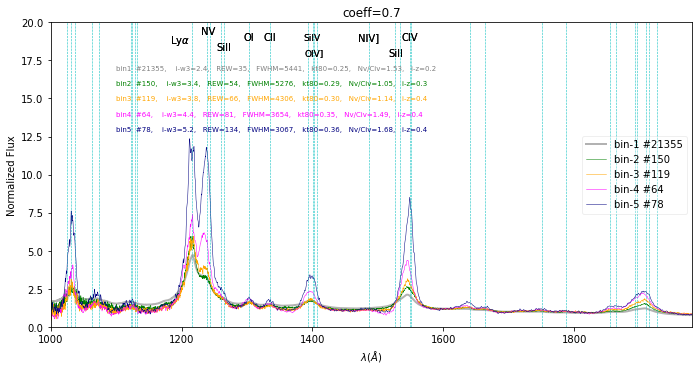

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


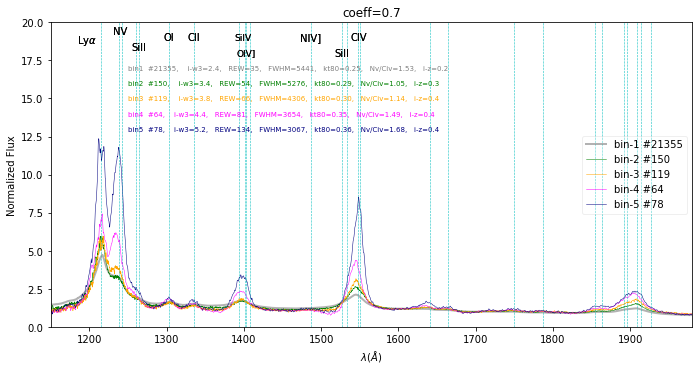

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


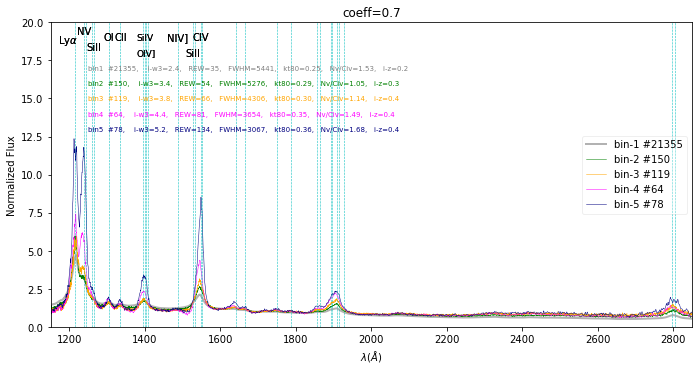

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


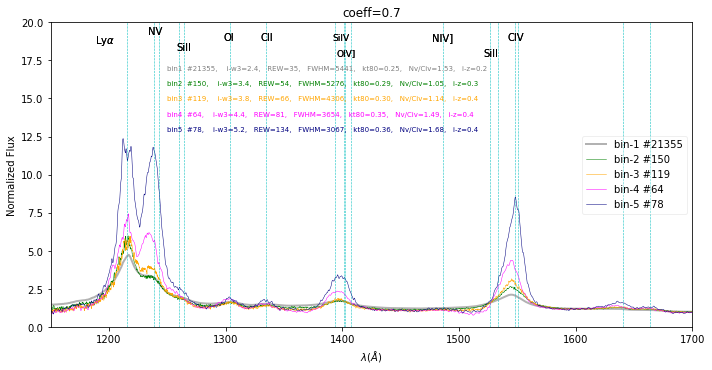

bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


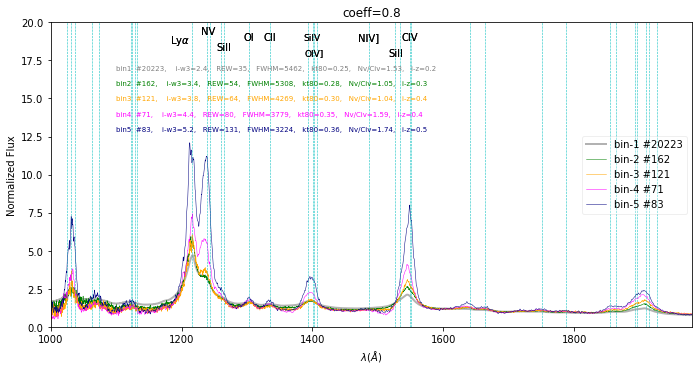

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


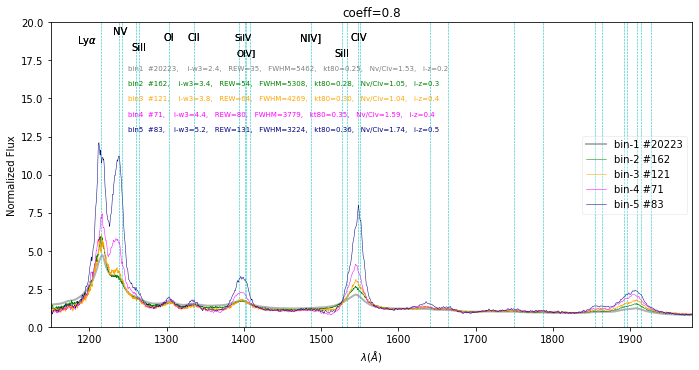

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


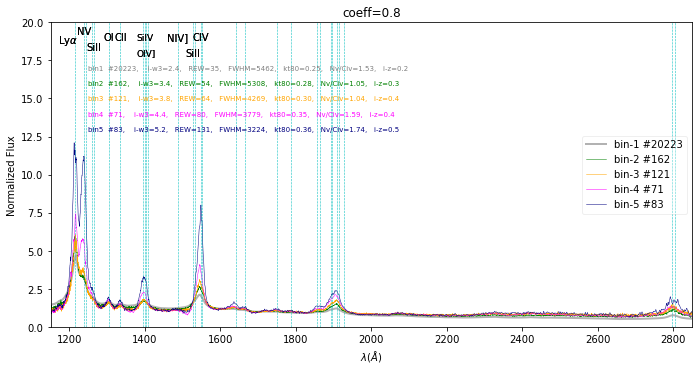

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


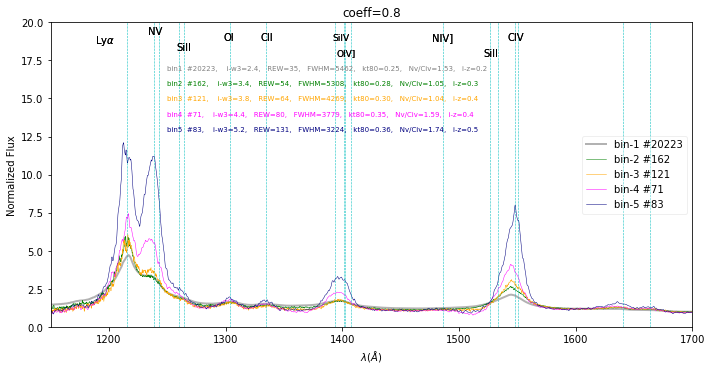

bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


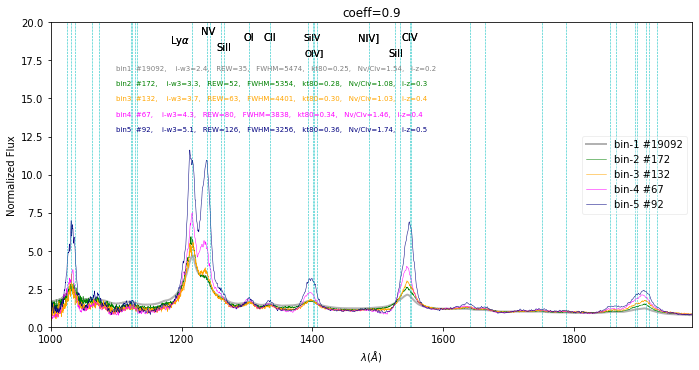

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


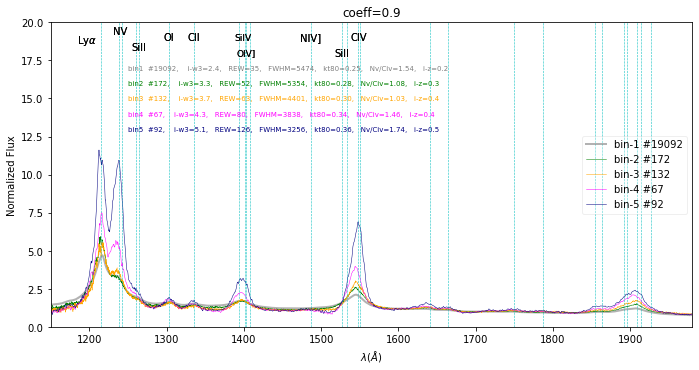

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


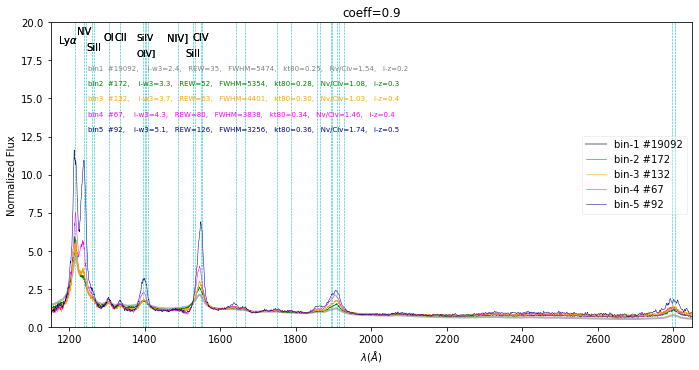

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


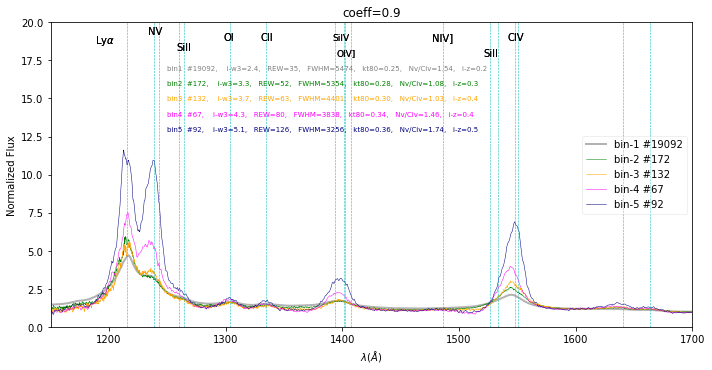

bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


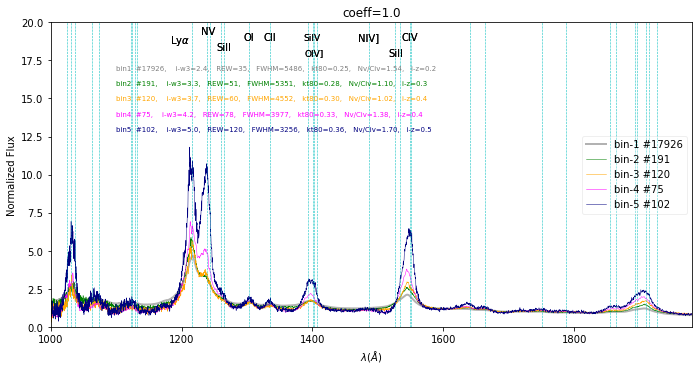

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


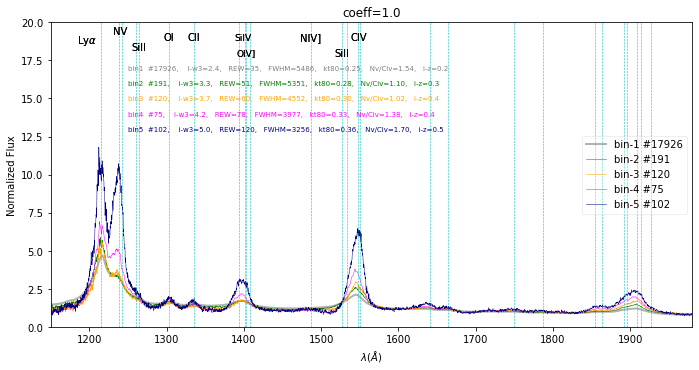

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


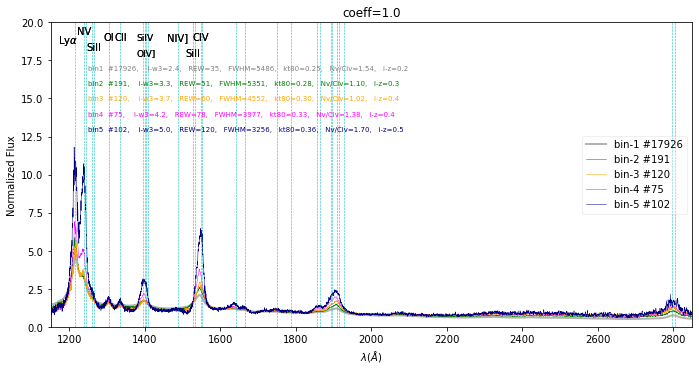

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


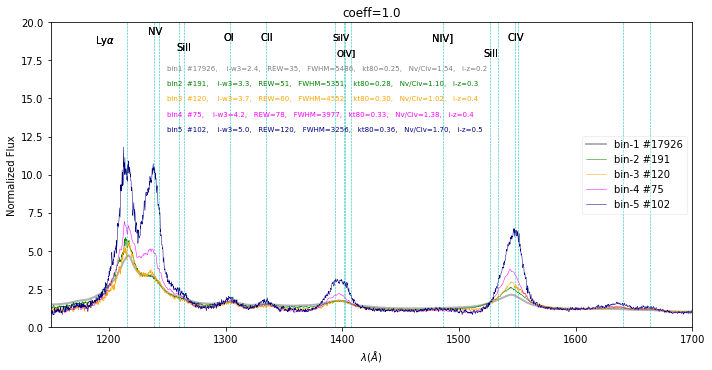

bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


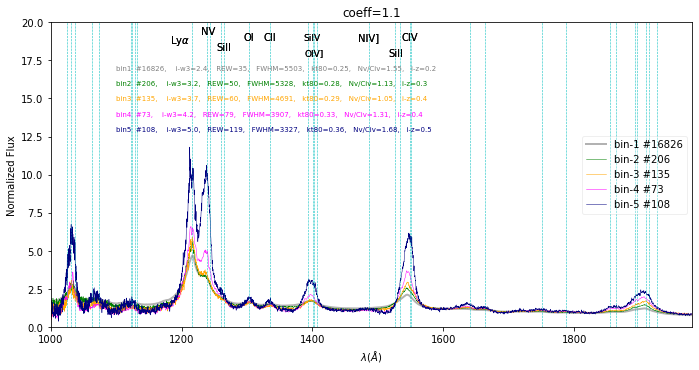

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


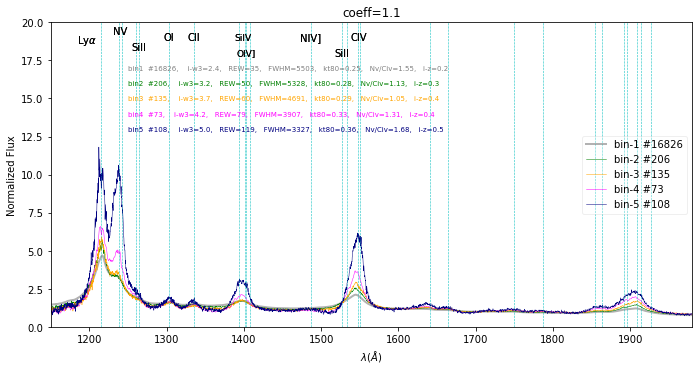

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


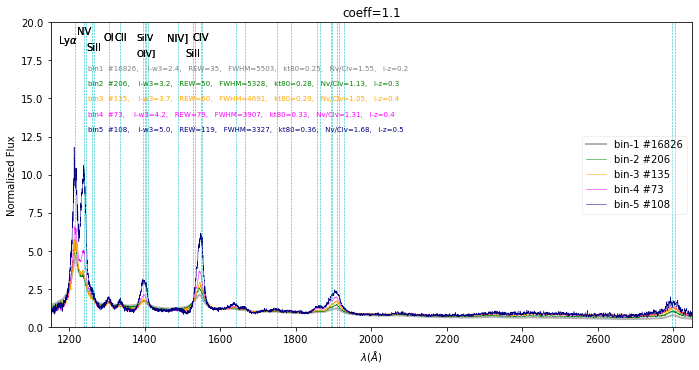

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


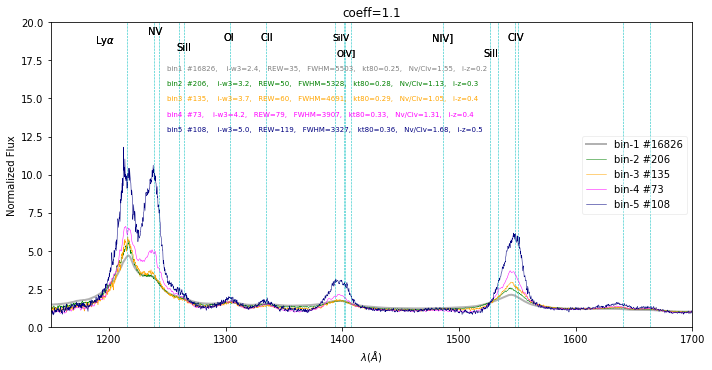

bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


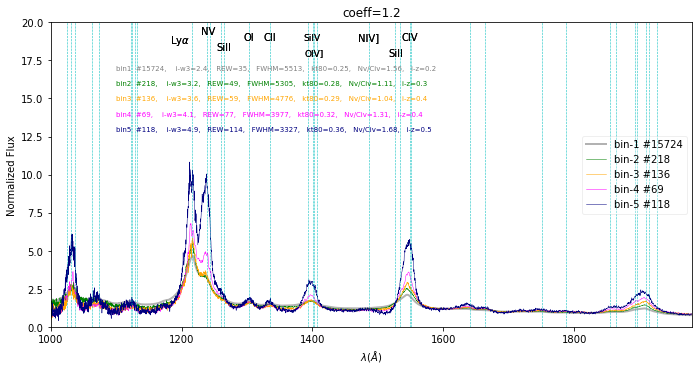

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


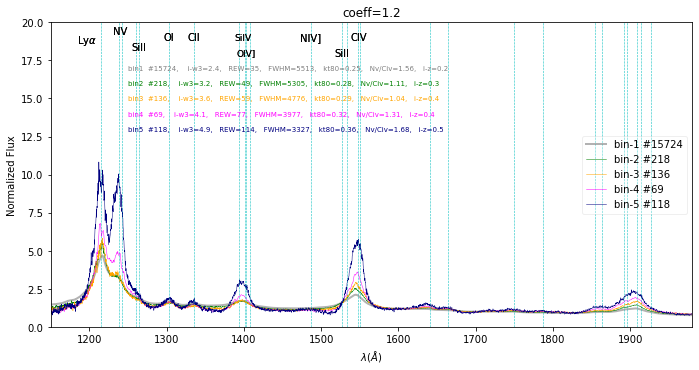

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


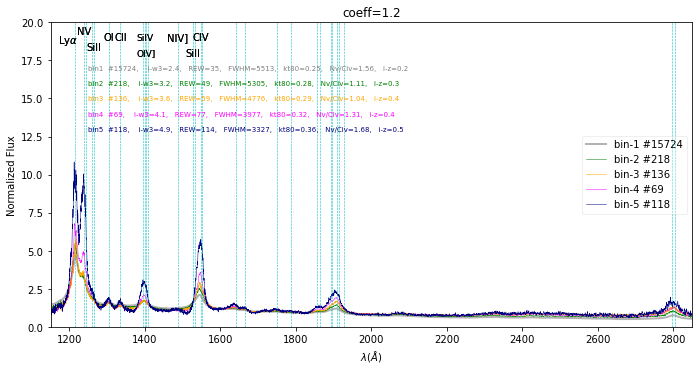

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


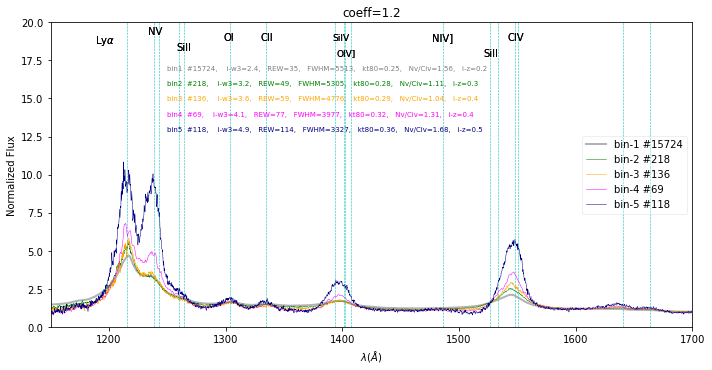

bin: 0 1000 to 1980
bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980


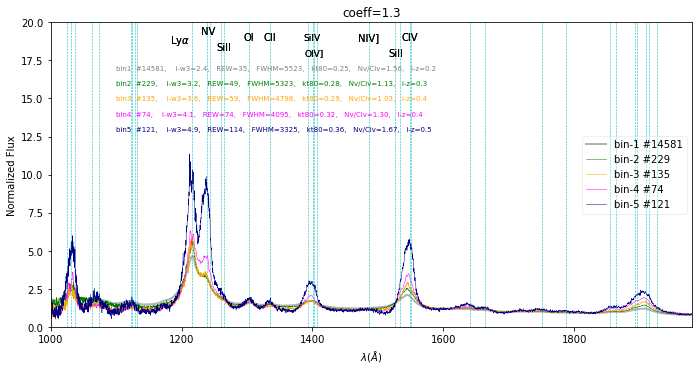

bin: 0 1150 to 1980
bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980


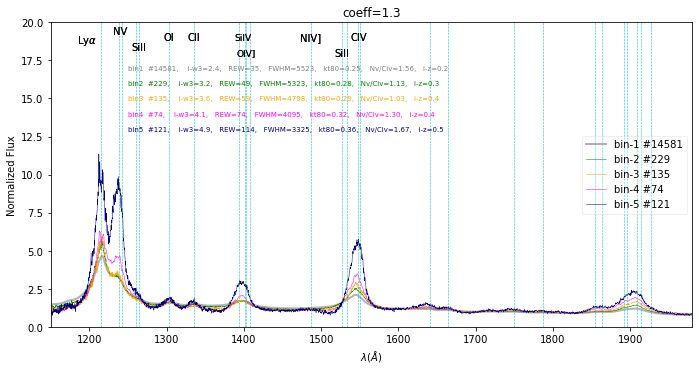

bin: 0 1150 to 2850
bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850


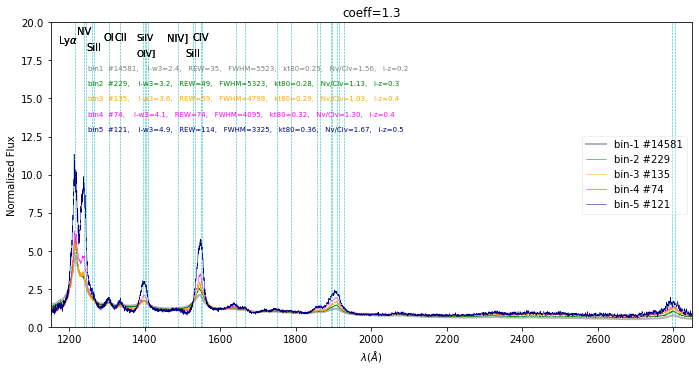

bin: 0 1150 to 1700
bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700


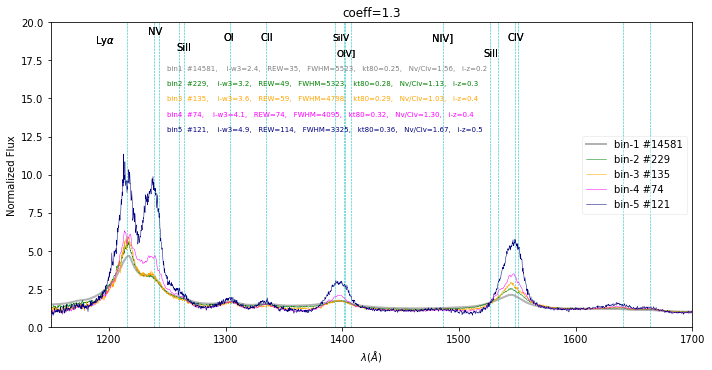

In [18]:
# plotting
from scipy import interpolate
# import pyfits
from numpy import *
import math
import scipy.ndimage
from scipy import interpolate
from numpy import nanmean
from numpy import nanmedian
from readSDSSspectrafast import *
from scipy import ndimage
from line_db import line_db
import os
#  nqsos is the total number of quasars in the catalog.
# zdr12 is the redshift from the DR12 catalog. You might use something else.
# zp1 is z+1
enclosing_ratio= 0.80
cone_direction=0
nqsos = len(z_dr12)
colors=['gray', 'green', 'orange', 'magenta', 'navy', 'red']
for coeff in [0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3]:

    bin_label=loadmat( '../IsoSurf/labels-coeff%.1f-inv3-inv9-exp1-15-exp2-2-open-80.mat'%(coeff))
    bin_label= np.array(bin_label["labels"])
    bin_label=bin_label[0]
    nBins = np.int32(max(bin_label))
    bin_pop = np.zeros([nBins])
    for b in range(nBins):
        bin_pop[b] = sum(bin_label==b+1)
    
    ymax=20
    ymin=-0.05*ymax
    fs=10
    fs1=9

    y_median = 0.9*ymax
    med_step=1
    legend_loc=7

    for ii in range(0,4):

        if(ii==0): lambda_min = 1000; lambda_max = 1980
        if(ii==1): lambda_min = 1150; lambda_max = 1980
        if(ii==2): lambda_min = 1150; lambda_max = 2850
        if(ii==3): lambda_min = 1150; lambda_max = 1700
        fig = plt.figure(figsize=(11.5,5.6))
        line_db(ymax, fs, fs1, lambda_max)

        plt.xlim(lambda_min,lambda_max)
        plt.ylim(ymin, ymax)
        # plt.axes().set_aspect('equal')
        x_median=lambda_min+100


#         for b in range(len(bin_pop)-1,-1,-1):
        for b in range(len(bin_pop)):

            if(bin_pop[b]>5):   
                print('bin:', b, lambda_min, 'to', lambda_max)
                med1=loadtxt('3d-cone-kde/kde-medspec-coeff-%.1f-r-%.2f-bin-%d-cone-%d.txt' %(coeff, enclosing_ratio, b, cone_direction))
                plt.ylabel('Normalized Flux')
                plt.xlabel(r'$\lambda  (\AA)$')
                w3_bin=[]
                imw3_bin=[]
                REW_bin=[]
                fwhm_bin=[]
                kt80_bin=[]
                frat_bin=[]
                iz_bin=[]
                Lum_bin=[]

                for i in range(nqsos):
                    if(bin_label[i]==b+1):
                        w3_bin.append(W3_0[i]) 
                        imw3_bin.append(iW3_0[i])
                        REW_bin.append(int(10**rew_0[i]))
                        fwhm_bin.append(fwhm_0[i])
                        kt80_bin.append(kt80_0[i])
                        frat_bin.append(frat_0[i])
                        iz_bin.append(iz_0[i])
                        Lum_bin.append(Lum_0[i])
                if(bin_pop[b]<100):
                    sm_med1 = ndimage.filters.gaussian_filter1d(med1,2.0)
                else:
                    sm_med1=med1

                # masking for plot ranges
                ind = (wgrid>lambda_min) & (wgrid<lambda_max)
                if b==0:
                    
                    plt.plot(wgrid[ind],  sm_med1[ind], lw = 2, alpha=0.6, c=colors[b], 
                             label='bin-%d #%d' %(b+1, bin_pop[b]))
                else:
                     plt.plot(wgrid[ind],  sm_med1[ind], lw = 0.5, c=colors[b], 
                             label='bin-%d #%d' %(b+1, bin_pop[b]))
                plt.text(x_median, y_median -(b+1)*med_step,
                         'bin%d  #%d,    i-w3=%.1f,   REW=%d,   FWHM=%d,   kt80=%.2f,   Nv/Civ=%.2f,   i-z=%.1f' 
                         %(b+1, bin_pop[b], np.median(imw3_bin),  
                            np.median(REW_bin), np.median(fwhm_bin),  
                            np.median(kt80_bin), np.median(frat_bin), 
                            np.median(iz_bin)), 
                         ha='left', va='center', color=colors[b], fontsize=7)

#         plt.text(x_median, y_median -(b+1)*med_step,
#                          'bin%d  #%d,    i-w3=%.1f,   REW=%d,   FWHM=%d,   kt80=%.2f,   Nv/Civ=%.2f,   i-z=%.1f' 
#                          %(b+1, bin_pop[b], np.median(imw3_bin),  
#                             np.median(REW_bin), np.median(fwhm_bin),  
#                             np.median(kt80_bin), np.median(frat_bin), 
#                             np.median(iz_bin)), 
#                          ha='left', va='center', color=c[b], fontsize=10)
        plt.legend(fancybox=True, framealpha=0.3, loc=legend_loc)
        line_db(ymax, fs, fs1, lambda_max)
        plt.title('coeff=%.1f'  %coeff)
#         plt.title(r'$\Omega=%.2f^{\circ}$, r=%.2f, $\hat{u}$=[%.2f, %.2f, %.2f]' 
#                 %(np.rad2deg(opening_angle), 
#                   enclosing_ratio, cone_vec_3d[cone_direction,0],
#                   cone_vec_3d[cone_direction,1],
#                   cone_vec_3d[cone_direction,2]))
        fig_path = '3d-cone-kde/med-spec/3d-coeff-%.1f-r-%d-dir-%d-li-%d-lf-%d.png' %(coeff, enclosing_ratio*100, cone_direction, lambda_min,
                                                                    lambda_max)
        plt.savefig(fig_path, format='png', dpi=200,  bbox_inches='tight')
        # os.system('evince '+ fig_path)
        # plt.savefig('/home/reza/erq/kde/bw/enc-r-%.2f/test.pdf' %(enclosing_ratio),format='pdf',  bbox_inches='tight')
        plt.show()
        plt.clf()
        plt.cla()
        plt.close()



In [ ]:
colors

In [ ]:


imw3_bin_med =[]
REW_bin_med = []
fwhm_bin_med = []
kt80_bin_med = []
frat_bin_med = []
iz_bin_med = []
Lum_bin_med = []
Bin=[]
BinPop=[]
# tip 
mask = tip_label
BinPop.append(sum(mask))
Bin.append("central")
imw3_bin_med.append("{0:.2f}".format(np.median(iW3_0[mask==True])))
REW_bin_med.append("{0:.0f}".format(np.median(10**(rew_0[mask==True]))))
fwhm_bin_med.append("{0:.0f}".format(np.median(fwhm_0[mask==True])))
kt80_bin_med.append("{0:.2f}".format(np.median(kt80_0[mask==True])))
frat_bin_med.append("{0:.2f}".format(np.median(frat_0[mask==True])))
iz_bin_med.append("{0:.2f}".format(np.median(iz_0[mask==True])))
Lum_bin_med.append("{0:.2f}".format(np.median(Lum_0[mask==True])))

for b in range(len(bin_pop)):
    mask = (bin_label==b+1)
    BinPop.append(sum(mask))
    Bin.append("{0:.0f}".format(b+1))
    imw3_bin_med.append("{0:.2f}".format(np.median(iW3_0[mask==True])))
    REW_bin_med.append("{0:.0f}".format(np.median(10**(rew_0[mask==True]))))
    fwhm_bin_med.append("{0:.0f}".format(np.median(fwhm_0[mask==True])))
    kt80_bin_med.append("{0:.2f}".format(np.median(kt80_0[mask==True])))
    frat_bin_med.append("{0:.2f}".format(np.median(frat_0[mask==True])))
    iz_bin_med.append("{0:.2f}".format(np.median(iz_0[mask==True])))
    Lum_bin_med.append("{0:.2f}".format(np.median(Lum_0[mask==True])))

tabProperties = Table([Bin,BinPop, imw3_bin_med, REW_bin_med, fwhm_bin_med, kt80_bin_med, frat_bin_med, iz_bin_med, Lum_bin_med],
                      names=('Bin','nBin', 'iw3', 'rew', 'fwhm', 'kt80', 'frat', 'iz', 'Lum'))
if os.path.exists('3d-Properties.fits'):
    os.system('rm 3d-Properties.fits')
tabProperties.write('3d-Properties.fits' , format='fits')

In [ ]:
bin_label

In [ ]:
mask

In [ ]:
dir

In [ ]:
for b in range(len(bin_pop), 1, -1):
    print(b)
